In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Step 1: Data Loading and Exploration

# Load the dataset
file_path = "The_Cancer_data_1500_V2.csv"
df = pd.read_csv(file_path)

# Display the first few rows
display(df.head())

# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Missing Values in Dataset:
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


In [ ]:
# Step 2: Target Variable and Feature Selection

# Separate features and target variable
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Step 3: Data Splitting for Training and Testing:

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(y_test)
print(y_train)

1116    1
1368    1
422     0
413     0
451     0
       ..
1083    0
990     0
650     1
1188    0
1498    1
Name: Diagnosis, Length: 450, dtype: int64
485     0
527     0
199     0
889     0
844     0
       ..
1130    0
1294    0
860     0
1459    0
1126    1
Name: Diagnosis, Length: 1050, dtype: int64


In [31]:
# Step 4: Model Training

# Train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [33]:
# Step 5: Model Evaluation and Prediction

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.4f}%")

Model Accuracy: 86.0000%


In [34]:
# Step 6: Confusion Matrix

# Evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[255  20]
 [ 43 132]]


In [35]:
#Step 7: Prediction on New Data

# Define a new patient for prediction
new_patient = np.array([[55, 1, 27.5, 1, 2, 7, 3, 0]])  # Example patient
new_patient_scaled = scaler.transform(new_patient)

# Make a prediction
new_prediction = svm_model.predict(new_patient_scaled)

print("Prediction for New Patient (0 = No Cancer, 1 = Cancer):", new_prediction[0])

Prediction for New Patient (0 = No Cancer, 1 = Cancer): 1


c:\Users\rtira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


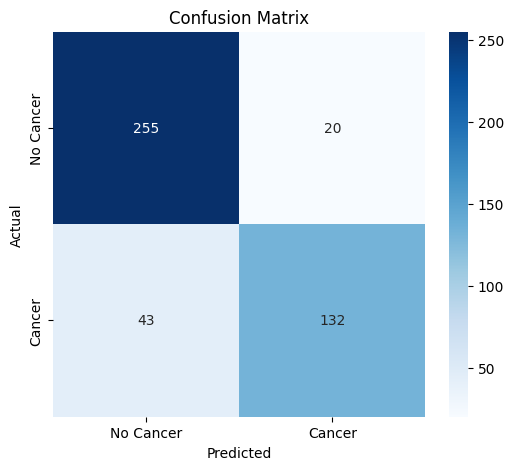

<Figure size 1000x600 with 0 Axes>

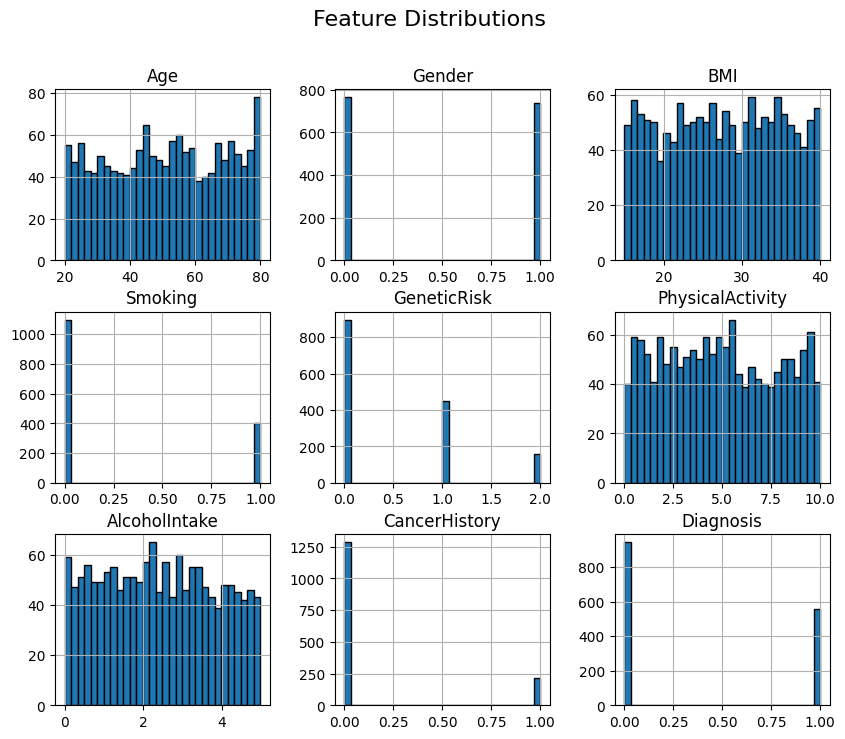

In [41]:
# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot feature distribution
plt.figure(figsize=(10,6))
df.hist(figsize=(10,8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
